<a href="https://colab.research.google.com/github/APANDEY2201/NewsGroupIdentification_SSL/blob/main/POC_newsgroup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import fetch_20newsgroups

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))

class_names = newsgroups_train.target_names

In [3]:
# Finding frequency of each category
targets, frequency = np.unique(newsgroups_train.target, return_counts=True)
targets_str = np.array(newsgroups_train.target_names)

In [4]:
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


In [5]:
#newsgroups_train['data'][1]

In [6]:
#type(newsgroups_train)

In [7]:
#type(newsgroups_train['data'])

In [8]:
newsgroups_train_df = pd.DataFrame({'data': newsgroups_train.data, 'target': newsgroups_train.target})

In [9]:
#newsgroups_train_df

In [10]:
from sklearn.model_selection import train_test_split

newsgroups_split_unlabelled, newsgroups_split_labelled = train_test_split(newsgroups_train_df,train_size = 0.7, random_state = 42, shuffle = True)
newsgroups_split_unlabelled = newsgroups_split_unlabelled.drop('target', axis = 1)
# newsgroups_train_df = pd.concat([newsgroups_split_train, newsgroups_split_test], axis=0)

## Preprocessing

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
#stopwords_english = []
stopwords_nltk = stopwords.words('english')
#print('stopwords_nltk: \n',stopwords_nltk)
lemmatizer = WordNetLemmatizer()
stopwords_english = ([lemmatizer.lemmatize(word) for word in stopwords_nltk])
#print('stopwords_english: \n',stopwords_english)


In [13]:
def lemmed_token_generator(text_data):
  #print(type(text_data))
  #lemmed_tokens = []
  nltk_tokens = nltk.word_tokenize(text_data)
  lemmatizer = WordNetLemmatizer()
  lemmed_tokens = ([lemmatizer.lemmatize(word) for word in nltk_tokens])
  return lemmed_tokens

In [14]:
def stopword_removal(text_data):
  #text_data = list(text_data)
  #print('text_data: ',text_data)
  #text_data = list(text_data)
  stopword_filtered = []
  stopword_filtered_str = ''
  for t in text_data:
    if t not in stopwords_english and len(t)>2:
      stopword_filtered.append(t)

  stopword_filtered_str = ' '.join([i for i in stopword_filtered])
  #print('Stopword_filtered: ', stopword_filtered)  
  return stopword_filtered_str


In [15]:
#newsgroups_train_df = newsgroups_train_df.head(2)

In [16]:
newsgroups_train_df.head(2)

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4


In [17]:
newsgroups_split_unlabelled, newsgroups_split_labelled

(                                                    data
 8410   \nThis was known as *Journey to the Far Side o...
 10072  Somewhere, someone told me that Satan was the ...
 1352   \n\nDIs it possible to track down "zuma" and d...
 2926   As most of you know, we have recently changed ...
 10024  Here is a story.  I bought a car about two wee...
 ...                                                  ...
 11284  \nAnd they're more like 1024x1024x8 charging &...
 5191   \nNo one should EVER rely on just a magazine t...
 5390   \n\nSpecifically, which changes are you talkin...
 860    \n\n\nThis is an interesting question to ponde...
 7270   \nI think Murray has done a great job.  He's p...
 
 [7919 rows x 1 columns],
                                                    data  target
 7492  Could someone please post any info on these sy...       4
 3546  \n\n     Don't bother if you have CPBackup or ...       2
 5582  5.25" Internal Low density disk drive.\n\nMono...       6
 4793  Hi,\n\nIn

In [18]:
newsgroups_split_labelled['data'] = newsgroups_split_labelled.apply((lambda x: newsgroups_split_labelled['data'].str.lower()), axis=0)
newsgroups_split_labelled['data'] = newsgroups_split_labelled.data.str.replace('[^a-zA-Z]', ' ')
newsgroups_split_labelled['data'] = newsgroups_split_labelled['data'].apply(lemmed_token_generator)
newsgroups_split_labelled['data'] = newsgroups_split_labelled['data'].apply(stopword_removal)
newsgroups_split_labelled.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,data,target
7492,could someone please post info system thanks b...,4
3546,bother cpbackup fastback offer option availabl...,2


In [19]:
newsgroups_split_unlabelled['data'] = newsgroups_split_unlabelled.apply((lambda x: newsgroups_split_unlabelled['data'].str.lower()), axis=0)
newsgroups_split_unlabelled['data'] = newsgroups_split_unlabelled.data.str.replace('[^a-zA-Z]', ' ')
newsgroups_split_unlabelled['data'] = newsgroups_split_unlabelled['data'].apply(lemmed_token_generator)
newsgroups_split_unlabelled['data'] = newsgroups_split_unlabelled['data'].apply(stopword_removal)
newsgroups_split_unlabelled.head(2)

,data
8410,known journey far side sun united state doppel...
10072,somewhere someone told satan angel charge musi...


## Bigrams (Bag of Words)

#### **newsgroups_train_df** has clean data

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def bow_features(train_data):
    # Bag-of-words representation
    bigram_bow_vectorize = CountVectorizer(ngram_range=(1,2), min_df=1, max_features=10000)
    bigram_bow_train = bigram_bow_vectorize.fit_transform(train_data.data) #bag-of-word features for training data
    #bow_test = bow_vectorize.transform(test_data.data)
    feature_names = bigram_bow_vectorize.get_feature_names() #converts feature index to the word it represents.
    shape = bigram_bow_train.shape
    #print('{} train data points.'.format(shape[0]))
    #print('{} feature dimension.'.format(shape[1]))
    #print('Most common word in training set is "{}"'.format(feature_names[bow_train.sum(axis=0).argmax()]))
    return bigram_bow_train, feature_names

In [21]:
bow_labelled, feature_labelled = bow_features(newsgroups_split_labelled)
bow_unlabelled, feature_unlabelled = bow_features(newsgroups_split_unlabelled)


In [22]:
#bow_train

In [23]:
# for i in bow_train:
#   print(i)

In [24]:
bigram_bow_labelled_df = pd.DataFrame.sparse.from_spmatrix(bow_labelled)
bigram_bow_unlabelled_df = pd.DataFrame.sparse.from_spmatrix(bow_unlabelled)

In [25]:
bigram_bow_labelled_df.shape

(3395, 10000)

In [118]:
type(bow_labelled)

scipy.sparse.csr.csr_matrix

In [26]:
bigram_bow_unlabelled_df.shape

(7919, 10000)

In [30]:
from sklearn.decomposition import PCA 

def pca_features(large_df, no_components):
  pca = PCA(no_components)  
  pca.fit(large_df)
  explained_variance = pca.explained_variance_ratio_
  score_pca = explained_variance.sum()
  return pd.DataFrame(pca.transform(large_df)), pca, score_pca


In [31]:
# from sklearn.decomposition import PCA 

# pca_bow_la = PCA(1500)  
# pca.fit(bigram_bow_labelled_df)
# projected_labelled_bow = pca.transform(bigram_bow_labelled_df)

#principalDf = pd.DataFrame(data = projected_tfidf, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])

projected_labelled_bow, pca_model_labelled, score_pca_bow_labelled = pca_features(bigram_bow_labelled_df, 20)

print(bigram_bow_labelled_df.shape)
print(projected_labelled_bow.shape)
print('score_pca_bow_labelled: ', score_pca_bow_labelled)

(3395, 10000)
(3395, 20)
score_pca_bow_labelled:  0.7900837389176124


In [34]:
projected_unlabelled_bow, pca_model_unlabelled, score_pca_bow_unlabelled = pca_features(bigram_bow_unlabelled_df, 20)

print(bigram_bow_unlabelled_df.shape)
print(projected_unlabelled_bow.shape)
print('score_pca_bow_unlabelled: ', score_pca_bow_unlabelled)

(7919, 10000)
(7919, 20)
score_pca_bow_unlabelled:  0.7264211114803305


## TF-IDF

In [35]:
def tf_idf_features(train_data):
    # Bag-of-words representation
    tf_idf_vectorize = TfidfVectorizer(ngram_range=(1, 2),max_features = 10000)
    tf_idf_train = tf_idf_vectorize.fit_transform(train_data.data) #bag-of-word features for training data
    feature_names = tf_idf_vectorize.get_feature_names() #converts feature index to the word it represents.
    #tf_idf_test = tf_idf_vectorize.transform(test_data.data)
   # print(tf_idf_train)
    return tf_idf_train, feature_names

In [36]:
tf_idf_labelled, f_names_tf_idf_labelled = tf_idf_features(newsgroups_split_labelled)
tf_idf_unlabelled, f_names_tf_idf_unlabelled = tf_idf_features(newsgroups_split_unlabelled)

In [38]:
tf_idf_labelled_df = pd.DataFrame.sparse.from_spmatrix(tf_idf_labelled)
tf_idf_unlabelled_df = pd.DataFrame.sparse.from_spmatrix(tf_idf_unlabelled)

In [41]:
# 1500 pe 81%
projected_labelled_tf_idf, pca_model_tf_idf_labelled, score_pca_tf_idf_labelled = pca_features(tf_idf_labelled_df, 1000)

print(tf_idf_labelled_df.shape)
print(projected_labelled_tf_idf.shape)
print('score_pca_bow_labelled: ', score_pca_tf_idf_labelled)

(3395, 10000)
(3395, 1000)
score_pca_bow_labelled:  0.6740161328496949


In [42]:
# 1500 pe chala hai
projected_unlabelled_tf_idf, pca_model_tf_idf_unlabelled, score_pca_tf_idf_unlabelled = pca_features(tf_idf_unlabelled_df, 1000)

print(tf_idf_unlabelled_df.shape)
print(projected_unlabelled_tf_idf.shape)
print('score_pca_bow_labelled: ', score_pca_tf_idf_unlabelled)

(7919, 10000)
(7919, 1500)
score_pca_bow_labelled:  0.6896545187038031


In [ ]:
# Baad me karengge
summarized_df = pd.concat([projected_bow,projected_tfidf],axis=1)
summarized_df.shape

## Word 2 vec -- [to do]

In [51]:
from gensim.models import Word2Vec, Phrases,KeyedVectors

## No change done, No Model Training Code
def w2v(feature_names):
  #feature_names = list(feature_names)
  n = 5
  list_of_lists = [feature_names[i:i + n] for i in range(0, len(feature_names), n)]
#  print(list_of_lists)

  model = Word2Vec(list_of_lists, size=300, min_count=1, workers=4)
  word_vectors = model.wv
  # model['browser']
  # model.similar_by_word('anarchist')
  w2v_df = pd.DataFrame(word_vectors.vocab.keys())
  return model, w2v_df, word_vectors

In [52]:
# model = w2v(feature_names)
# word_vectors = model.wv


In [46]:
# w2v_df = pd.DataFrame(word_vectors.vocab.keys())

In [53]:
model_w2v_labelled, vocab_labelled, word_vectors_labelled = w2v(feature_labelled)

In [54]:
type(word_vectors_labelled)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [65]:
#word_vectors_labelled.get_vector('university')

## LDA

In [123]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

def lda_feature(bow_labelled_, bow_unlabelled_):
  n_top_words = 20
  lda = LatentDirichletAllocation(n_components=20, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

  #tf_feature_names = tf_vectorizer.get_feature_names()
  lda.fit(bow_labelled_)
  lda.fit(bow_unlabelled_)
  return lda
#  plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [124]:
type(bow_labelled)

scipy.sparse.csr.csr_matrix

In [125]:
lda_model = lda_feature(bow_labelled, bow_unlabelled)

In [127]:
import pickle
filename = 'lda_model_labelled.pkl'
pickle.dump(lda_model, open(filename, 'wb'))

In [128]:
lda_features_df = pd.DataFrame(lda_model.components_)

In [130]:
def lda_output(text, model):
  text_lst = lemmed_token_generator(text)
  #text_lst = list(text)
  tokenized_list = []
  for i in text_lst:
    tokenized_list.append(i)
  
  vector = model[tokenized_list]
  return vector

In [137]:
lda_features_labelled_df = pd.DataFrame(lda_model.transform(bow_labelled))
lda_features_unlabelled_df = pd.DataFrame(lda_model.transform(bow_unlabelled))

In [138]:
lda_features_unlabelled_df.shape

(7919, 20)

In [139]:
from matplotlib import pyplot as plt

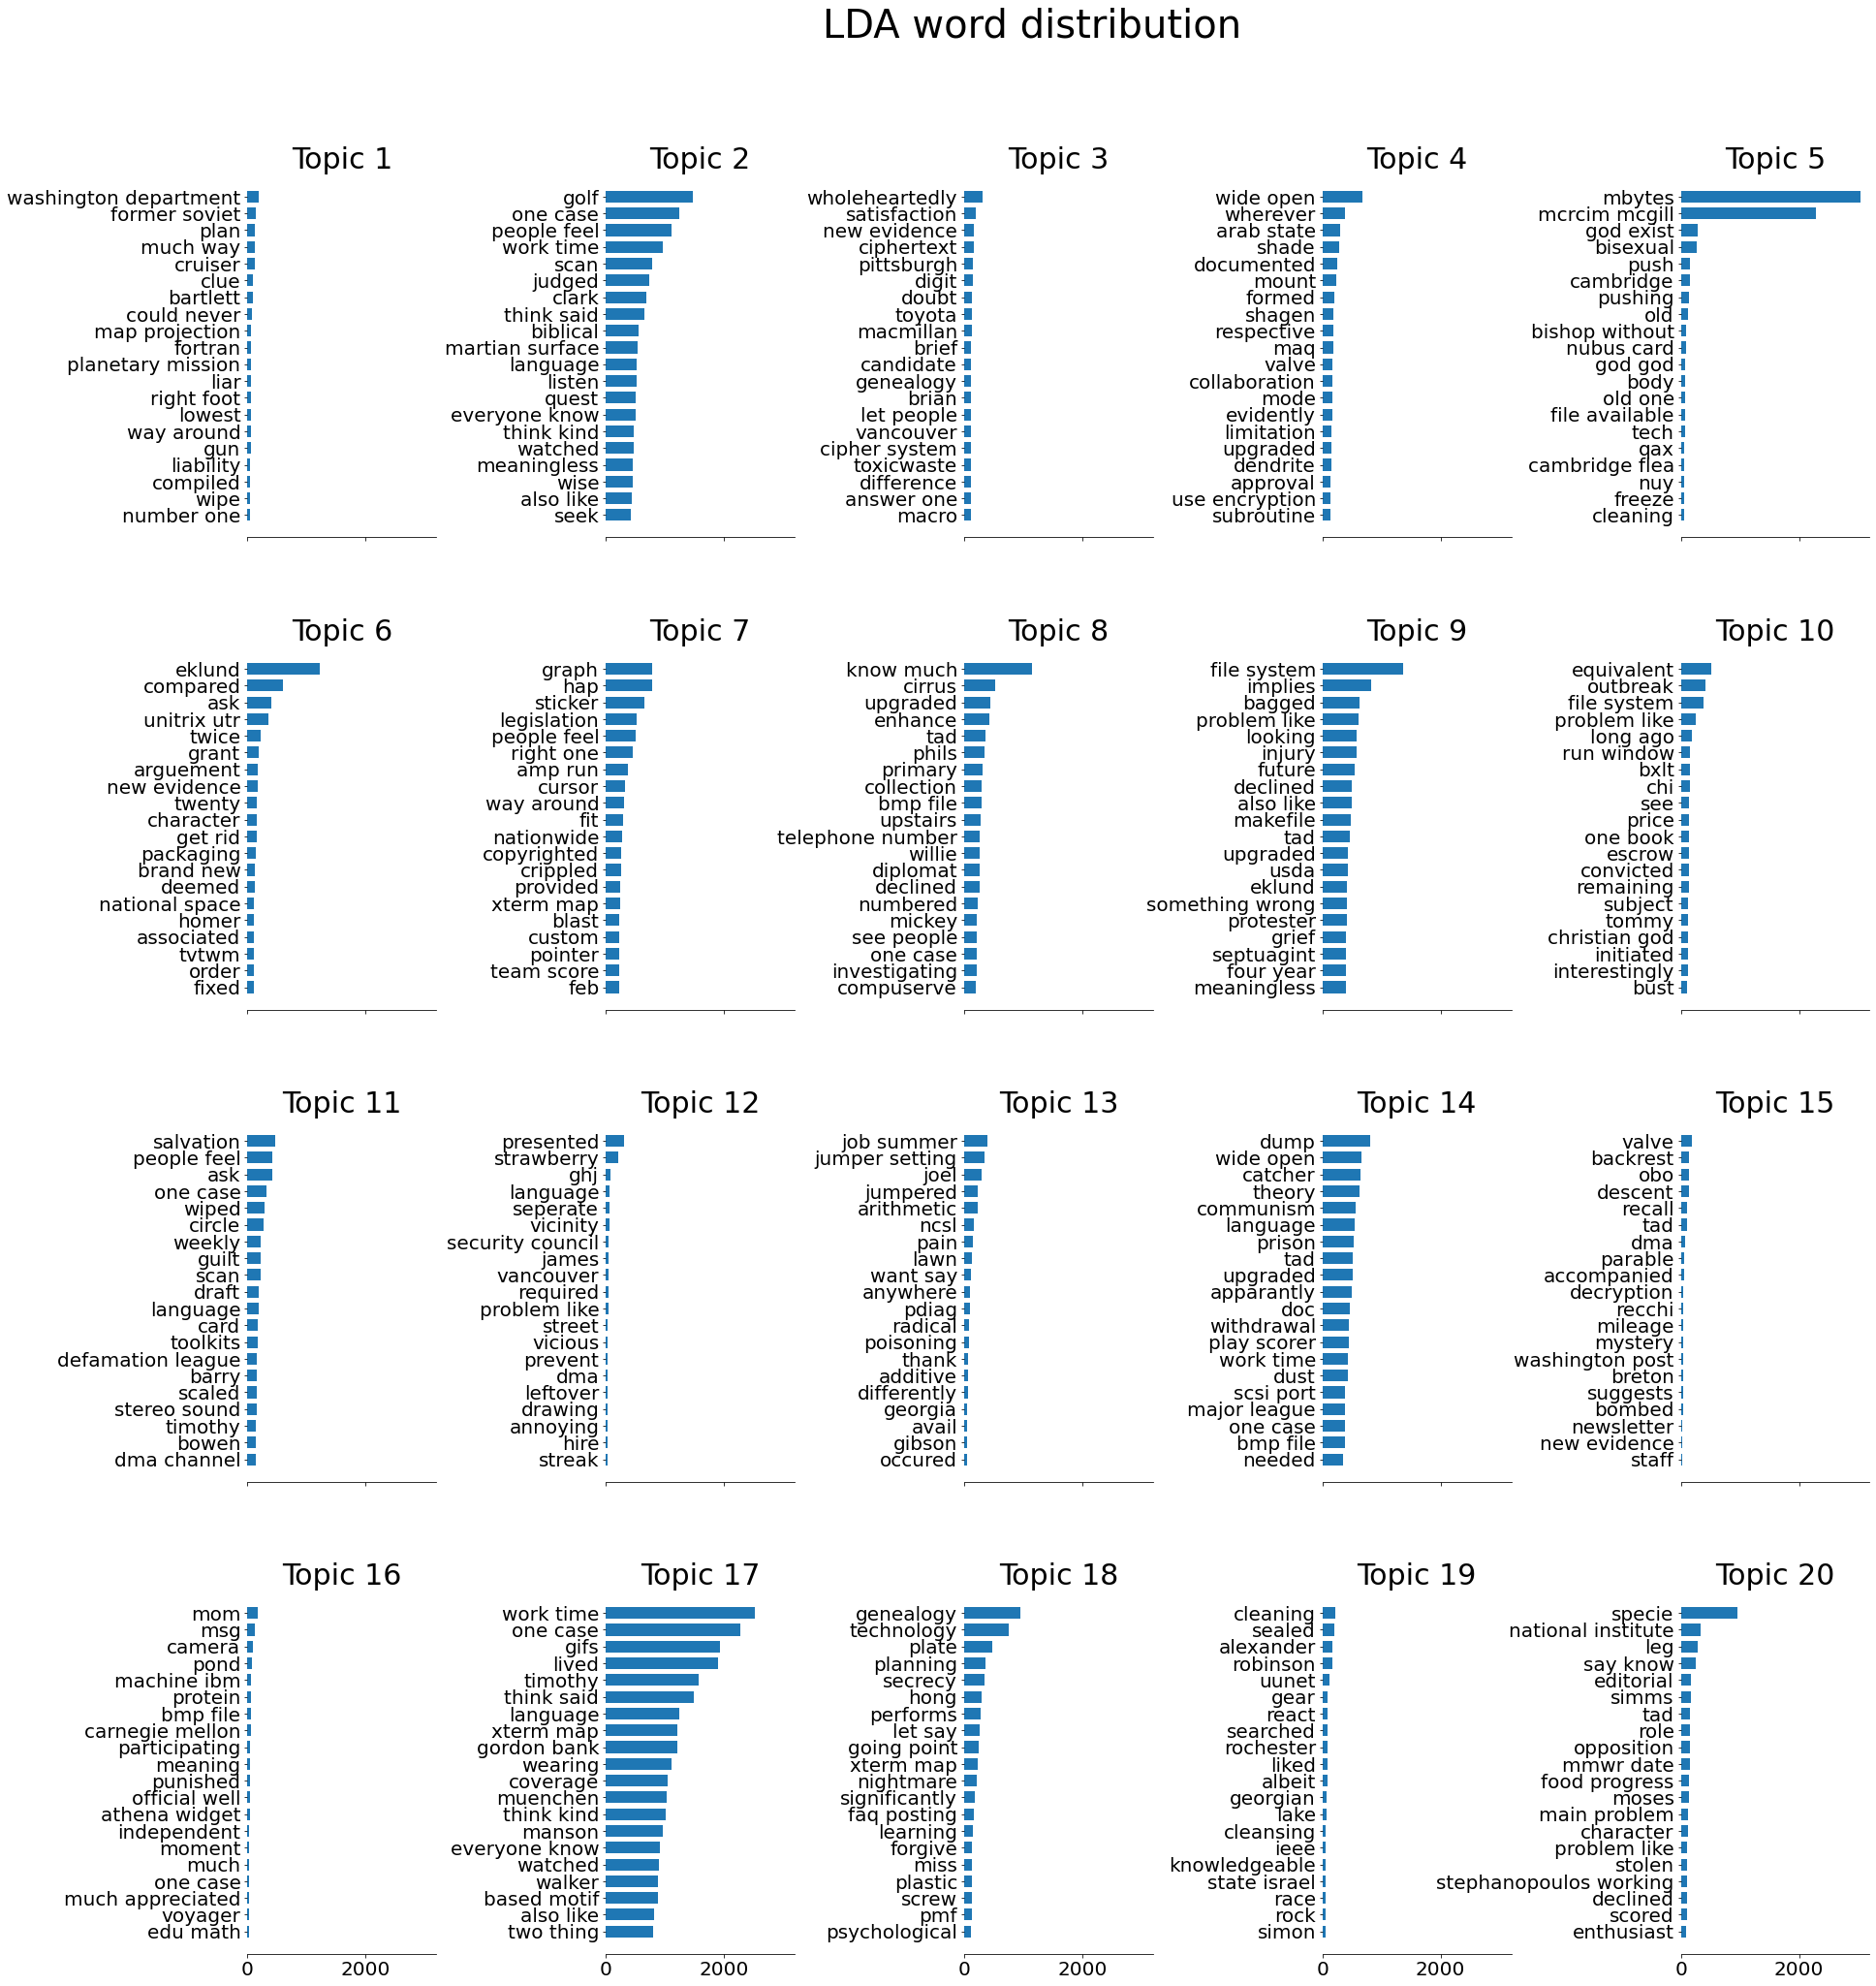

In [143]:
n_top_words = 20
fig, axes = plt.subplots(4, 5, figsize=(30, 30), sharex=True)
axes = axes.flatten()

for topic_idx, topic in enumerate(lda_model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_labelled[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LDA word distribution', fontsize=40)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()


## Naive Bayes

In [144]:
from sklearn.naive_bayes import MultinomialNB

In [145]:
mnb = MultinomialNB()

In [146]:
from classifier import NaiveBayesSemiSupervised

ImportError: ignored

#### X_train = Combination of all the features in a single dataframe, bigram_bow_df, tf_idf_df, lda_features_df and wordtovecDF
 

In [ ]:
y_train = newsgroups_train_df['target']

In [ ]:
#mnb.fit(X_train, y_train)

In [ ]:
## Next step is to combine all the dataframes. Features of X_train is too large, maybe we need to have some kind of feature selection

In [ ]:
X_train = pd.concat([lda_features_df,tf_idf_df,bigram_bow_df], axis=1)
